<a href="https://colab.research.google.com/github/Christina-Joseph/Task-2--Unsupervised-Machine-Learning/blob/main/Task_2_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

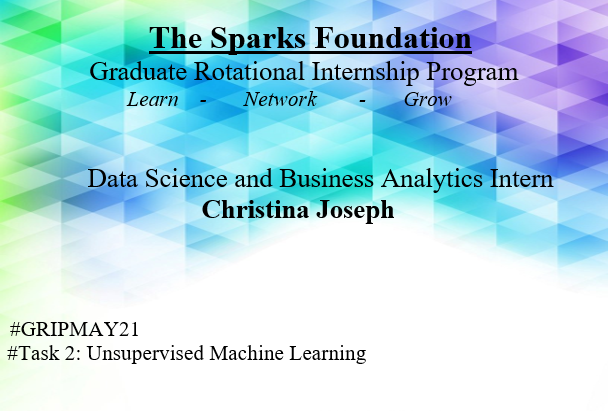

# **GRIP: THE SPARKS FOUNDATION**
# **Author: Christina Joseph**
__Data Science and Business Analytics Intern__ 

# **Task 2: Prediction using Unsupervised Machine Learning**
__Problem Statement:__

In this task, by using the K-Means Clustering, we need to predict the optimum number of clusters for the iris dataset and represent it graphically.

__Data Description:__

The provided dataset consists of six columns which represents Id, Sepal length, Sepal width, petal length, petal width and iris species respectively.

__K-Means Clustering:__

K-Means Clustering, an unsupervised Machine Learning Algorithm, is a centroid based algorithm or we can call it distance based algorithm. In this, each cluster is defined by a centroid. The main objective is to minimize the sum of distances between the points and their respective cluster centroids.

#Step 1: Importing the dataset

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the iris dataset from remote link
df = pd.read_csv('Iris.csv')
print('The dataset is successfully imported')

The dataset is successfully imported


In [3]:
#return first few rows
df.head()   

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


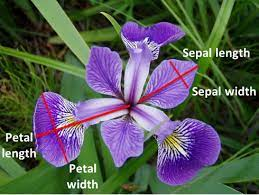

#Step 2: Visualizing the data

In [4]:
#dimensions of the dataframe
df.shape

(150, 6)

In [5]:
#statistical description of the dataframe
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#identifying categorical and continuous variables
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
#to know all types of unique values
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

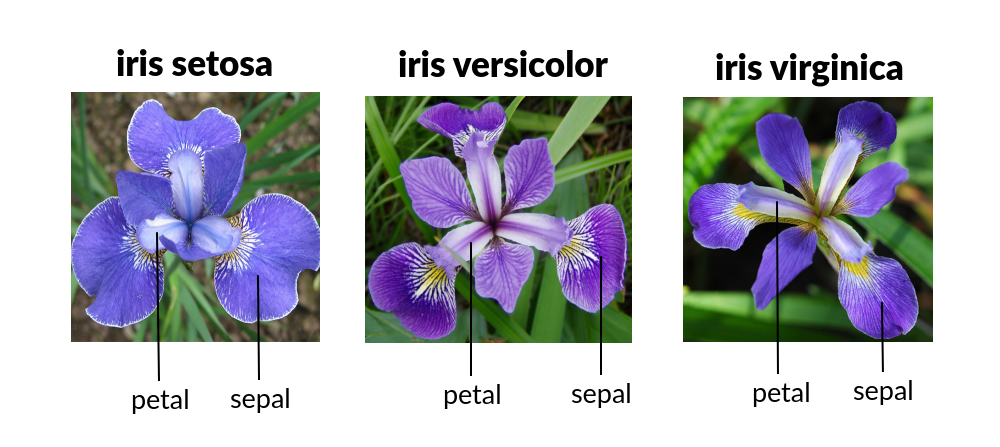

In [9]:
# find the count of unique values in the index
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
# detect missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
iris = pd.DataFrame(df)
iris_df = iris.drop(columns=["Species","Id"])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Step 3: Finding the optimum number of clusters

We are required to specify the number of clusters before performing K-means clustering. There are numerous methods like Silhouette coefficient, the Elbow method and Gap statistic method. Here, we will consider the Elbow method.

__Elbow Method:__

In this method, the number of clusters are varies within a certain range. For each number, Within-Cluster-Sum-of-Squares(WCSS) value is calculated and stored in a list.These values are then plotted against the range of number of clusters used before and picking the elbow of the curve as the number of clusters to use.

In [12]:
#Importing K-Means Clustering
from sklearn.cluster import KMeans

In [13]:
#Calculating the Within-Cluster-Sum-of-Squares
WCSS = []
clusters_range = range(1,11)
for i in clusters_range:
 km = KMeans(n_clusters=i, init="k-means++", random_state=0)
 km = km.fit(iris_df)
 WCSS.append(km.inertia_)              

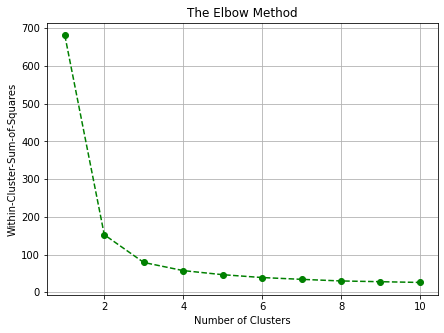

In [14]:
#Plotting the "Within-Cluster-Sum-of-Squares" against clusters range
plt.figure(figsize=(7,5))
plt.plot(clusters_range,WCSS,'go--',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.grid()
plt.show()


The graph clearly specifies the actual definition of 'The Elbow Method', the optimum clusters is where the elbow occurs. This is when the Within-Cluster-Sum-of-Squares(WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as __"3"__

#Step 4: Applying K-Means Clustering on the data

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km = KMeans(n_clusters=3, init='k-means++', random_state=0)
y = km.fit_predict(iris_df)         #predicting the model
y              #represents the label of clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In the above output, number 0, 1 and 2 implies the species of iris i.e setosa, versicolor and virginica respectively.

In [16]:
# returns centroid of the cluster formed
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

#Step 5: Visualizing the clusters

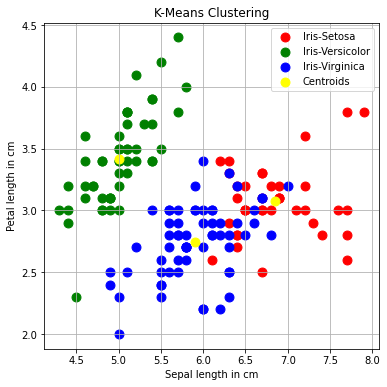

In [17]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(6,6))
x=iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[y==0,0], x[y==0,1], s=80, c='red', label='Iris-Setosa')
plt.scatter(x[y==1,0], x[y==1,1], s=80, c='green', label='Iris-Versicolor')
plt.scatter(x[y==2,0], x[y==2,1], s=80, c='blue', label='Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s=80, c='yellow', label='Centroids')
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.title('K-Means Clustering')
plt.legend()
plt.grid()
plt.show()


__Successfully completed Prediction using Unsupervised Learning.__

                                                                        ****************